In [5]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [6]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [7]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [8]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drag_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset & store results
clinical_mouse_data_df = pd.merge(clinical_trial_df, mouse_drag_df, on="Mouse ID")
clinical_mouse_data_df.to_csv('combined_clinical_data.csv')

# Display the data table for preview
clinical_mouse_data_df.info()
clinical_mouse_data_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1906 non-null   object 
 1   Timepoint           1906 non-null   int64  
 2   Tumor Volume (mm3)  1906 non-null   float64
 3   Metastatic Sites    1906 non-null   int64  
 4   Drug                1906 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [9]:
clinical_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame & Preview DataFrame
result_df = clinical_mouse_data_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].copy().sort_values(["Drug", "Timepoint"])

mu_tumor_df = result_df.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].mean().to_frame().reset_index()
mu_tumor_df.info()
mu_tumor_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Drug                100 non-null    object 
 1   Timepoint           100 non-null    int64  
 2   Tumor Volume (mm3)  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame / Preview DataFrame
mu_tumor_std_df = result_df.groupby(['Drug' ,'Timepoint'])['Tumor Volume (mm3)'].sem().to_frame().reset_index()
mu_tumor_std_df.info()
mu_tumor_std_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Drug                100 non-null    object 
 1   Timepoint           100 non-null    int64  
 2   Tumor Volume (mm3)  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [12]:
# Minor Data Munging to Re-Format the Data Frames - mu_tumor_by_drugtime_data_df
tumor_df = mu_tumor_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_df.info()
tumor_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Capomulin  10 non-null     float64
 1   Ceftamin   10 non-null     float64
 2   Infubinol  10 non-null     float64
 3   Ketapril   10 non-null     float64
 4   Naftisol   10 non-null     float64
 5   Placebo    10 non-null     float64
 6   Propriva   10 non-null     float64
 7   Ramicane   10 non-null     float64
 8   Stelasyn   10 non-null     float64
 9   Zoniferol  10 non-null     float64
dtypes: float64(10)
memory usage: 880.0 bytes


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [13]:
# Isolate four treatments - data
mu_tumor4_df = mu_tumor_df[(mu_tumor_df['Drug'] == 'Capomulin') | (mu_tumor_df['Drug'] == 'Placebo') | (mu_tumor_df['Drug'] == 'Ketapril') | (mu_tumor_df['Drug'] == 'Infubinol')]
mu_tumor4_df

trans_tumor4_df = mu_tumor4_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').reset_index()
trans_tumor4_df.info()
trans_tumor4_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timepoint  10 non-null     int64  
 1   Capomulin  10 non-null     float64
 2   Infubinol  10 non-null     float64
 3   Ketapril   10 non-null     float64
 4   Placebo    10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


In [14]:
# Isolate four treatments - error/SEM data
err_tumor4_df = mu_tumor_std_df[(mu_tumor_std_df['Drug'] == 'Capomulin') | (mu_tumor_std_df['Drug'] == 'Placebo') | (mu_tumor_std_df['Drug'] == 'Ketapril') | (mu_tumor_std_df['Drug'] == 'Infubinol')]

errt_tumor4_df = err_tumor4_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').reset_index()
errt_tumor4_df.info()
errt_tumor4_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timepoint  10 non-null     int64  
 1   Capomulin  10 non-null     float64
 2   Infubinol  10 non-null     float64
 3   Ketapril   10 non-null     float64
 4   Placebo    10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.235102,0.264819,0.218091
2,10,0.702684,0.282346,0.357421,0.402064
3,15,0.838617,0.357705,0.580268,0.614461
4,20,0.909731,0.476210,0.726484,0.839609
5,25,0.881642,0.550315,0.755413,1.034872
6,30,0.934460,0.631061,0.934121,1.218231
7,35,1.052241,0.984155,1.127867,1.287481
8,40,1.223608,1.055220,1.158449,1.370634
9,45,1.223977,1.144427,1.453186,1.351726


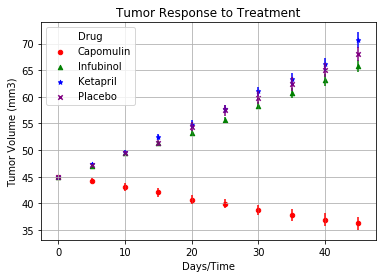

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate the Plot (with Error Bars) - four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
# Add labels

xerr = errt_tumor4_df['Timepoint']
yerr1 = errt_tumor4_df['Capomulin']
yerr2 = errt_tumor4_df['Infubinol']
yerr3 = errt_tumor4_df['Ketapril']
yerr4 = errt_tumor4_df['Placebo']

ax = trans_tumor4_df.plot.scatter(x='Timepoint', y='Capomulin', yerr=yerr1, c='red', marker='o', label='Capomulin')
trans_tumor4_df.plot.scatter(x='Timepoint', y='Infubinol', c='green', yerr=yerr2, marker='^', label='Infubinol', ax=ax)
trans_tumor4_df.plot.scatter(x='Timepoint', y='Ketapril', c='blue', yerr=yerr3, marker='*', label='Ketapril', ax=ax)
trans_tumor4_df.plot.scatter(x ='Timepoint',y='Placebo', yerr=yerr4, c='purple', marker='x', label='Placebo', ax=ax)

plt.xlabel("Days/Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")


#plt.figure()
plt.grid()

# Save the Figure
plt.savefig("../Images/tumor_response.png")

# Show the Figure
plt.show()
plt.tight_layout();

## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint, Convert to DataFrame
# Preview DataFrame
result_meta_df = clinical_mouse_data_df[['Drug', 'Timepoint', 'Metastatic Sites']].copy().sort_values(["Drug", "Timepoint"])
result_meta_df.info()
result_meta_df.head()

mu_meta_df = result_meta_df.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean().to_frame().reset_index()
mu_meta_df.info()
mu_meta_df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1112
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Drug              1906 non-null   object
 1   Timepoint         1906 non-null   int64 
 2   Metastatic Sites  1906 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 59.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Drug              100 non-null    object 
 1   Timepoint         100 non-null    int64  
 2   Metastatic Sites  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [17]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame & Preview DataFrame
mu_meta_std_df = result_meta_df.groupby(['Drug' ,'Timepoint'])['Metastatic Sites'].sem().to_frame().reset_index()
mu_meta_std_df.info()
mu_meta_std_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Drug              100 non-null    object 
 1   Timepoint         100 non-null    int64  
 2   Metastatic Sites  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [18]:
# Preview that Reformatting worked
mu_errt_meta4_df = mu_meta_std_df[(mu_meta_std_df['Drug'] == 'Capomulin') | (mu_meta_std_df['Drug'] == 'Placebo') | (mu_meta_std_df['Drug'] == 'Ketapril') | (mu_meta_std_df['Drug'] == 'Infubinol')]
mu_errt_meta4_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [19]:
# Minor Data Munging to Re-Format the Data Frames
errt_meta4_df = mu_errt_meta4_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').reset_index()

In [20]:
mu_meta_df.to_csv('tumor_meta_file.csv')

In [21]:
# Isolate four treatments
mu_meta4_df = mu_meta_df[(mu_meta_df['Drug'] == 'Capomulin') | (mu_meta_df['Drug'] == 'Placebo') | (mu_meta_df['Drug'] == 'Ketapril') | (mu_meta_df['Drug'] == 'Infubinol')]
mu_meta4_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [22]:
trans_meta4_df = mu_meta4_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').reset_index()
trans_meta4_df.info()
trans_meta4_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timepoint  10 non-null     int64  
 1   Capomulin  10 non-null     float64
 2   Infubinol  10 non-null     float64
 3   Ketapril   10 non-null     float64
 4   Placebo    10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


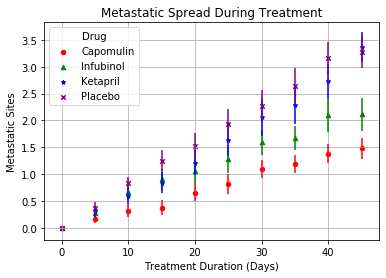

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate the Plot (with Error Bars) - four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
# Add labels
xerr = errt_meta4_df['Timepoint']
yerr1 = errt_meta4_df['Capomulin']
yerr2 = errt_meta4_df['Infubinol']
yerr3 = errt_meta4_df['Ketapril']
yerr4 = errt_meta4_df['Placebo']

ax = trans_meta4_df.plot.scatter(x='Timepoint', y='Capomulin', yerr=yerr1, c='red', marker='o', label='Capomulin')
trans_meta4_df.plot.scatter(x='Timepoint', y='Infubinol', yerr=yerr2, c='green', marker='^', label='Infubinol', ax=ax)
trans_meta4_df.plot.scatter(x='Timepoint', y='Ketapril', yerr=yerr3, c='blue', marker='*', label='Ketapril', ax=ax)
trans_meta4_df.plot.scatter(x ='Timepoint',y='Placebo', yerr=yerr4, c='purple', marker='x', label='Placebo', ax=ax)

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Spread During Treatment")

plt.grid()

# Save the Figure
plt.savefig("../Images/tumor_meta_sites_response.png")

# Show the Figure
plt.show()
plt.tight_layout();

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [24]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

ct_tumor_df = clinical_mouse_data_df.groupby(["Drug", "Timepoint"]).agg('count').reset_index()
ct_tumor_df = ct_tumor_df.drop(columns = ['Tumor Volume (mm3)', 'Metastatic Sites'])
ct_tumor_df.rename(columns={'Mouse ID': 'Mouse Count'}, inplace=True)
ct_tumor_df.info()  
ct_tumor_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Drug         100 non-null    object
 1   Timepoint    100 non-null    int64 
 2   Mouse Count  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [25]:
# Minor Data Munging to Re-Format the Data Frames
# Isolate four treatments & Preview the Data Frame
ct_tumor4_df = ct_tumor_df[(ct_tumor_df['Drug'] == 'Capomulin') | (ct_tumor_df['Drug'] == 'Placebo') | (ct_tumor_df['Drug'] == 'Ketapril') | (ct_tumor_df['Drug'] == 'Infubinol')]
ct_tumor4_df
tran_ct_tumor4_df = ct_tumor4_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count').reset_index()


In [26]:
tran_ct_tumor4_df

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


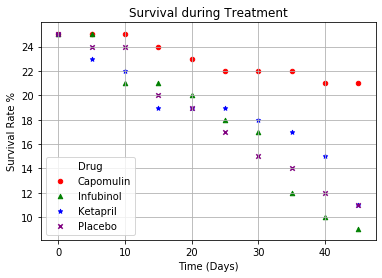

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate the Plot (Accounting for percentages)


ax = tran_ct_tumor4_df.plot.scatter(x='Timepoint', y='Capomulin', c='red', marker='o', label='Capomulin')
tran_ct_tumor4_df.plot.scatter(x='Timepoint', y='Infubinol', c='green', marker='^', label='Infubinol', ax=ax)
tran_ct_tumor4_df.plot.scatter(x='Timepoint', y='Ketapril', c='blue', marker='*', label='Ketapril', ax=ax)
tran_ct_tumor4_df.plot.scatter(x ='Timepoint',y='Placebo', c='purple', marker='x', label='Placebo', ax=ax)

plt.title("Survival during Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate %")

plt.grid()

# Save the Figure
plt.savefig("../Images/survival_rates.png")

# Show the Figure
plt.show()
plt.tight_layout();

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [28]:
mu_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [29]:
result_perc_df = mu_tumor_df[(mu_tumor_df['Timepoint'] == 45)]
result_perc_df['PercChg'] = (result_perc_df['Tumor Volume (mm3)']/45 - 1) * 100
result_perc_df = result_perc_df.drop(columns = ['Tumor Volume (mm3)', 'Timepoint'])
result_perc_df

,Drug,PercChg
9,Capomulin,-19.475303
19,Ceftamin,42.516492
29,Infubinol,46.123472
39,Ketapril,57.028795
49,Naftisol,53.923347
59,Placebo,51.297960
69,Propriva,47.241175
79,Ramicane,-22.320900
89,Stelasyn,52.085134
99,Zoniferol,46.579751


In [30]:
result_perc4_df = result_perc_df[(result_perc_df['Drug'] == 'Capomulin') | (result_perc_df['Drug'] == 'Placebo') | (result_perc_df['Drug'] == 'Ketapril') | (result_perc_df['Drug'] == 'Infubinol')].reset_index()
result_perc4_df

,index,Drug,PercChg
0,9,Capomulin,-19.475303
1,29,Infubinol,46.123472
2,39,Ketapril,57.028795
3,59,Placebo,51.297960


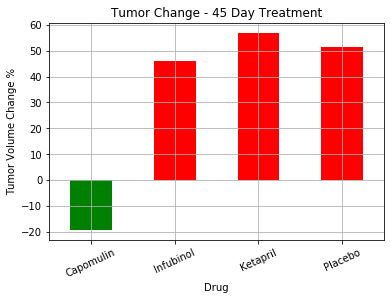

<Figure size 432x288 with 0 Axes>

In [31]:
result_perc4_df.plot.bar(x='Drug', y='PercChg', color=(result_perc4_df['PercChg'] > 0).map({True: 'r',
                                                    False: 'g'}), rot=25, legend=False)

plt.title("Tumor Change - 45 Day Treatment")
plt.ylabel("Tumor Volume Change %")
plt.grid()
# Save the Figure
plt.savefig("../Images/tumor_chg_treatmt.png")

# Show the Figure
plt.show()
plt.tight_layout();

#fig.show();

![Metastatic Spread During Treatment](../Images/change.png)

## Observations

#### Tumor Volume

    Capomulin is the only treatment to reduce the tumor size.  Overtime 
    Ketapril yielded the worst results of the 4 selected treatments.
    

#### Metastatic Sites

    All treatments overtime saw an increase in sites.  Capomulin had the best results and Ketapril & the Placebo yielded similar results at the end of the trials.
    

#### Survival Rates

    Capomulin yielded the best results with a survival rate of mid to low 80%.  Infubinol produced the worst results of less than 40% survival rate.  Placebo & Ketapril yielded similar results at the end of the trial.
    